## **Principles and Practice: Data Understanding**
#### For the book **Applied Machine Learning from the 1st principles by Prithiviraj Damdoaran**
----
In this notebook we will take a deep dive into data understanding. Get the dataset from [here](https://github.com/rudeboybert/JSE_OkCupid/blob/master/profiles.csv.zip)

**Goal of the EDA:** We will be exploring dataset to see what the life style, habits and diet of the OkCupid members in San Fransisco reveal about their overall fitness and see if there is a correlation between these attributes and obesity levels. Please note that these are volunteered data hence how accurate and honest were the self-assessment is something we need to keep in mind. A self declared data is yet another reason this isn’t evidence based. Also an important life style factor to measure fitness level - how active life styles the lead i.e.if they exercised or not is not available as a feature. But some preliminary analysis revealed that the essays text and hobbies can help us extract isActive feature. But thats a NLP task and out of scope for this exercise. You could pick it up as a follow for this exercise.



In [109]:
%matplotlib inline
from utils import gen_feature_specific_df
from utils import mean_median_mode_plot
from utils import custom_plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.filterwarnings('ignore')

In [110]:
okc_profiles = pd.read_csv('profiles.csv')
okc_profiles.shape

(59946, 31)

## **Peek at the data**

In [113]:
okc_profiles.sample(1)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
38995,60,average,mostly anything,socially,never,graduated from college/university,i have lived in san francisco for over 30 years and have enjoyed\nevery minute of it. i couldn't see myself not living in a city but\nlove to travel and experience being in new environments. my\nchildren are out of college and working so i am on my own and\nliking the independence that comes with that.,"i have owned my own business for over 25 years and now am starting\nto cut back and enjoy other things in my life; traveling, cooking,\nentertaining, exercising, theater, music. reading. my friendships\nare long and deep so spend alot of time nurturing those\nrelationships.",being in the company of other people.,"sense of humor, my new york style, friendly","books:devil in the white city, art of fielding, what is the what,\nanything written by dave eggers, cutting for stone ..i am in a book\nclub so i have read a wide variety of books. it is one of my\nfavorite pastimes.<br />\n<br />\nmovies: 25th hour, after the wedding, lives of others, slumdog\nmillionaire (yes, slumdog millionaire)..<br />\nmusic: i enjoy a wide variety of music, blues, jazz, 60's music,\nindi bands,opera","my children, family and friends<br />\ngood food and wine<br />\npeet's coffee<br />\nnordstrom sale<br />\na good book on the beach<br />\nmy remote control",what my next adventure will be!,usually out with friends,NaN,if you are looking for good conversation and are willing to try new\nthings.,white,63.0,-1,sales / marketing / biz dev,2012-06-29-20-46,"san francisco, california",has kids,straight,likes dogs and likes cats,agnosticism and laughing about it,f,virgo but it doesn&rsquo;t matter,no,english,single


### Lets' get the features we are intetested in (based on common sense) from the full list of features

In [114]:
okc_profiles.shape

(59946, 31)

In [115]:
fitness_df = okc_profiles[['age', 'sex','education','job', 'offspring', 'location','income', 'diet', 'drinks','drugs', 'religion', 'smokes', 'pets','orientation','ethnicity', 'height', 'status', 'body_type']]
fitness_df.sample(3)

,age,sex,education,job,offspring,location,income,diet,drinks,drugs,religion,smokes,pets,orientation,ethnicity,height,status,body_type
49573,59,f,graduated from ph.d program,other,NaN,"el cerrito, california",-1,mostly anything,rarely,never,NaN,no,likes dogs and likes cats,straight,white,67.0,single,fit
4161,38,m,graduated from college/university,computer / hardware / software,NaN,"san francisco, california",-1,mostly anything,socially,never,hinduism but not too serious about it,when drinking,likes dogs and likes cats,straight,indian,69.0,single,fit
22863,26,f,graduated from college/university,other,NaN,"san francisco, california",-1,NaN,socially,NaN,NaN,no,likes dogs and likes cats,straight,NaN,68.0,single,thin


### This chapter mainly focusses only on EDA and not modelling but still as practice we will stash 20% of data for testing purposes.

In [6]:
fitness_df = fitness_df.sample(frac=1)
msk = np.random.rand(len(fitness_df)) < 0.8
test_df = fitness_df[~msk]
fitness_df = fitness_df[msk]
fitness_df.shape

(47882, 18)

### **Ratio of Male and Female members**

In [116]:
print(str(np.round(fitness_df[fitness_df['sex']== 'm'].count()[0] / fitness_df.shape[0],2) * 100) + "% :" + str(np.round(fitness_df[fitness_df['sex']== 'f'].count()[0] / fitness_df.shape[0],2) * 100) + "%") 

60.0% :40.0%


### **Mosaic Plot of Gender vs Orientation**

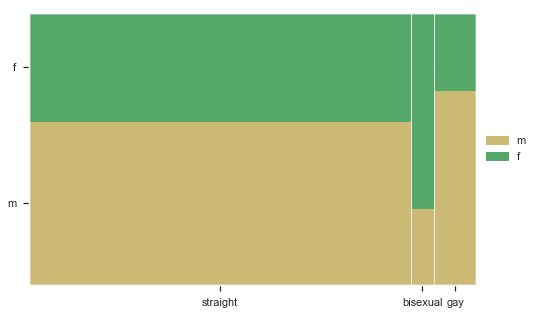

In [117]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 8, 5

props = {}
# Dictionary introduced here
col_dic = {'f': 'g', 'm': 'y'}
for x in ['gay', 'straight', 'bisexual']:
    for y, col in col_dic.items():
        props[(x, y)] ={'color': col}

mosaic(fitness_df, ['orientation', 'sex'], properties=props, labelizer=lambda k: '')

# Part added by me based on the linked answer
legenditems = [(plt.Rectangle((0,0),1,1, color=col_dic[c]), "%s" %c)
                 for i,c in enumerate(fitness_df['sex'].unique().tolist())]
plt.legend(*zip(*legenditems), ncol=1, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## **Full profile of the dataset**

* So we have ~60K (59946) rows and 17 columns (here in after features) the sample (here in after dataset).
* As we can see features can be numeric like income or non-numeric (here in after categorical) like job or diet.
* Machine learning algorithms are “happiest” when presented with data in a vector space. The reasons are not surprising: we can do Linear algebra and Vector math on them. For instance a ML model would be happy to see the fitness_df as a matrix of shape 59946 (rows) x 17 (columns) as opposed to a dataframe with numerical and categorical features. 
* So as a part of data understanding and data preparation we need to encode all non-numerical features into numerical. We will get to that in a moment.

In [118]:
# profile = ProfileReport(fitness_df, title='OkCupid Profiling Report')
# profile

### **Examine the Datatypes of the features**

In [119]:
fitness_df.dtypes

age            int64  
sex            object 
education      object 
job            object 
offspring      object 
location       object 
income         int64  
diet           object 
drinks         object 
drugs          object 
religion       object 
smokes         object 
pets           object 
orientation    object 
ethnicity      object 
height         float64
status         object 
body_type      object 
dtype: object

### **Check for Missing values**

In [120]:
fitness_df.isna().any()

age            False
sex            False
education      True 
job            True 
offspring      True 
location       False
income         False
diet           True 
drinks         True 
drugs          True 
religion       True 
smokes         True 
pets           True 
orientation    False
ethnicity      True 
height         True 
status         False
body_type      True 
dtype: bool

In [121]:
fitness_df['body_type'].unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

In [122]:
fitness_df['income'].unique()

array([     -1,   80000,   20000,   40000,   30000,   50000,   60000,
       1000000,  150000,  100000,  500000,   70000,  250000])

In [123]:
fitness_df['height'].unique()

array([75., 70., 68., 71., 66., 67., 65., 72., 62., 64., 69., 73., 74.,
       60., 63., 76., 61., 78., 79., 59., 80., 91., 83., 77., 58., 56.,
       95., 57., 87., 81., 36., 43., 52., 55., 53., 93.,  8., 54., 82.,
        3., 86., 42., 84., 94., 50.,  6., 47., 49., 48., 90., 88., nan,
       37.,  9., 51.,  1., 92., 26., 85., 89.,  4.])

### **Measure of central tendency**
* For this exercise lets make the missing values as 0 and ignore them 
* We WON'T resorting to any imputations here.

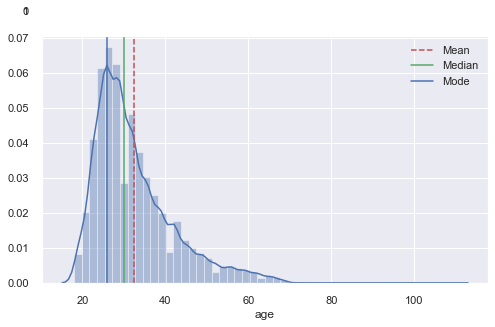

In [124]:
fitness_df['age'] = fitness_df['age'].fillna(0)
mean_median_mode_plot(fitness_df[fitness_df['age'] >0], 'age', False)

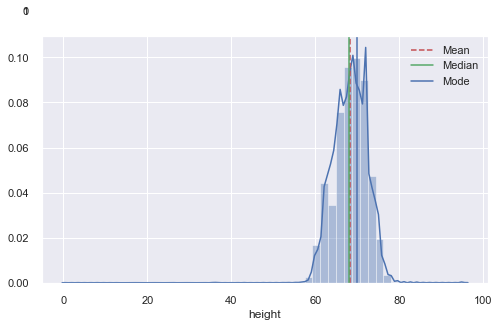

In [125]:
fitness_df['height'] = fitness_df['height'].fillna(0)
mean_median_mode_plot(fitness_df[fitness_df['height'] >0], 'height', False)

### **Handling missing values**
----

* **We can see that features like body_type, job, diet trun out to have NaN's**
* **But features can have missing values in 2 forms**
    * Features with NaN's (like **body_type** in our case)
    * Features having special filler values (like **income and height** which has -1 as a filler in our case)
    * Features having a mix of both NaN's and/or fillers
* **Handling missing values is actually a science as it depends the plausible reasons for missing in the 1st place.**
* **Values could be**. 
    * **Missing randomly**: Like in the case of data entry errors.
    * **Missing but with a pattern**: Like in the case of surveys were respondents skip certain questions.
        * For instance in census figures people with high income usually don't mention it. (self-censoring)
        * For instance in job applications people skip sexual orientation or ethnicity.
        * You could find a common thread.
    * **Missing by design**: Exceptions in the process that generated the data from which samples were taken.
        * Programming exceptions
        * Redacted values: Privacy, 3rd party censoring
* **High level strategies to handle missing values are**
  * **Discard the instances (rows)**: If the proportion of the missing values is miniscule 
  * **Discard the feature (columns)**: If the proportion of the missing values is miniscule 
  * **Acquire missing values**: Going back to the business process or Subject matter expert who can possibly help in getting the missing values back.
  * **Imputation**: It is just a fancy way to fill missing values with some plausible value.
      * **Value Based imputation**
      * **Model Based imputation**
  * **Do nothing** : Another interesting strategy I learned from kagglers is to simply clear the NaNs and let the model learn interesting patterns. Tree Induction espcially Ensemble models have track record with this strategy. Nonetheless we can't premeditate anything now as it is too early.
      
**References**:      
1. http://www.stat.columbia.edu/~gelman/arm/missing.pdf
2. http://www.stat.uchicago.edu/~eichler/stat24600/Admin/MissingDataReview.pdf


In [126]:
col_dtypes = zip(fitness_df.columns,fitness_df.dtypes)
for col, dtype in col_dtypes:
    if dtype == 'O':
        fitness_df[col] = fitness_df[col].fillna('ans_skipped')    # for EDA purposes lets use a filler
    else:
        fitness_df[col] = fitness_df[col].fillna(0)                # We are simply going make the missing numeric values 0 and ignore them as they are only minuscule

fitness_df.isna().any()

age            False
sex            False
education      False
job            False
offspring      False
location       False
income         False
diet           False
drinks         False
drugs          False
religion       False
smokes         False
pets           False
orientation    False
ethnicity      False
height         False
status         False
body_type      False
dtype: bool

#### Some observations
* After cleaning misisng values, Body_type field has a 'skipped' (no answer) and a 'rather not say' (prefer not to disclose) values
* Whoever skipped this question or chose to say 'rather not say' was probably embarrased to mention this ? 
* Because its a dating site and looks play a major role and hiding body_type isnt exactly putting your sexy foot forward. 
* Should you replace 'skipped'(no answer) with a 'rather not say' ? Probably not !

In [127]:
fitness_df['body_type'].unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit',
       'ans_skipped', 'skinny', 'curvy', 'full figured', 'jacked',
       'rather not say', 'used up', 'overweight'], dtype=object)

### **Handling Extreme Values and Outliers**
----
* All natural features numerical can have out of ordinary values for a given problem domain, 
    * Age years: Any value more 100 or less than 18 should raise a suspicion. These are **extreme values** 
    * Age years: Any value in the range of 65-75 years and these are **outliers**
    * Height in inches: with anything more than 100 inches or less than 40 inches for an adult should raise a suspicion, These are **extreme values** 
    * Height in inches: Any value in the range of 75-80 inches These are **outliers** 
* **Usually extreme values are implausible and the most popular strategy is to discard them**
* **Outliers are hanlled on a case to case basis and problem domain**
* **Also we will see why distribution plot with mean and SD is not good way to diagnose if the dataset has outliers.** 

### Lets compare the viz of outliers in Age and Height using a distribution plot and a box plot
* Box and whisker plots (or box plots in short) were invented by John Tukey exclusively i to visualise median and IQR, as you can see a box plot better shows the outliers and extreme values
* Here is a good explanation on how to find out outliers and extreme values using Box plots and Tukey fences.
    * https://www.purplemath.com/modules/boxwhisk3.htm
*  The "interquartile range", abbreviated "IQR", is just the width of the box in the box-and-whisker plot. That is, IQR = Q3 – Q1 and any values below Q1 – 1.5×IQR or above Q3 + 1.5×IQR is considered an outliers and extreme values. These values are called the **Tukey Fences**

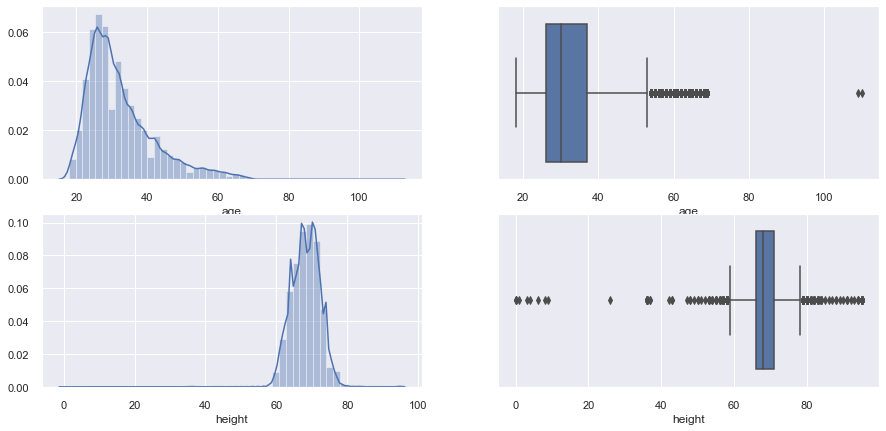

In [128]:
f, axes = plt.subplots(2, 2, figsize=(15,7))
sns.distplot(fitness_df['age'], ax=axes[0,0])
sns.boxplot(x=fitness_df['age'], ax=axes[0,1])
sns.distplot(fitness_df['height'], ax=axes[1,0])
sns.boxplot(x=fitness_df['height'], ax=axes[1,1])
plt.show()

In [129]:
def discard_extreme_values(df):
    
    # Lets see what % of the Age-wise Outliers in the dataset and discard if they are minuscule as suspected
    pct_outliers_age = df[(df['age'] > 70) | (df['age'] < 18)].shape[0] * 100 / df.shape[0]
    if pct_outliers_age < 1:         
        df = df[~((df['age'] > 70) | (df['age'] < 18))]
        
    # Lets what % of the Height-wise Outliers in the dataset and discard if they are minuscule as suspected        
    df['height'] = df['height'] * 0.083   # Inches to feet
    pct_outliers_height = df[(df['height'] > 7) | (df['height'] < 4)].shape[0] * 100 / df.shape[0]
    if pct_outliers_height < 1:
        df = df[~((df['height'] > 7) | (df['height'] < 4))]    
        
    return df

In [130]:
def discard_outliers_IQR(df):
    
    # Age
    Q1 = fitness_df['age'].describe()[4]
    Q3 = fitness_df['age'].describe()[6]
    IQR = Q3-Q1
    df = df[~((df['age'] < Q1- (1.5 * IQR)) | (df['age'] > Q3 + (1.5 * IQR)))]
    
    #Height
    Q1 = fitness_df['height'].describe()[4]
    Q3 = fitness_df['height'].describe()[6]
    IQR = Q3-Q1
    df = df[~((df['height'] < Q1- (1.5 * IQR)) | (df['height'] > Q3 + (1.5 * IQR)))]
        
    return df

#### Discarding outliers and extreme values
*  **In the figure above values immediately outside of the box are the outliers and the values at the far end are extreme values**
*  With Tukey fences we may have to discard folks who are "older" for the general crowd in a online dating app say who are in late 50s and early 60s.
*  With Tukey fences we may have to discard folks who are "taller" for the general crowd.
*  Both are outright baseliess discriminations against certain individuals aka a biased approach.
*  So we will only be discarding the outliers.

In [131]:
fitness_df = discard_extreme_values(fitness_df)

### **Age Distrbution of the members Male vs Female**

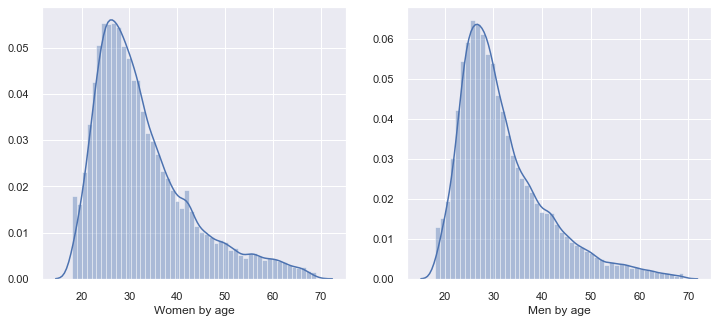

In [132]:
f, axes = plt.subplots(1, 2, figsize=(12,5))
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(fitness_df[fitness_df['sex']=='f']['age'], hist=True, ax=axes[0])
axes[0].set_xlabel("Women by age")
sns.distplot(fitness_df[fitness_df['sex']=='m']['age'], hist=True, ax=axes[1])
axes[1].set_xlabel("Men by age")
plt.show()

### **Height Distrbution of the members Male vs Female**

In [133]:
fitness_df['height'].describe()

count    59881.000000
mean     5.668669    
std      0.320449    
min      4.067000    
25%      5.478000    
50%      5.644000    
75%      5.893000    
max      6.972000    
Name: height, dtype: float64

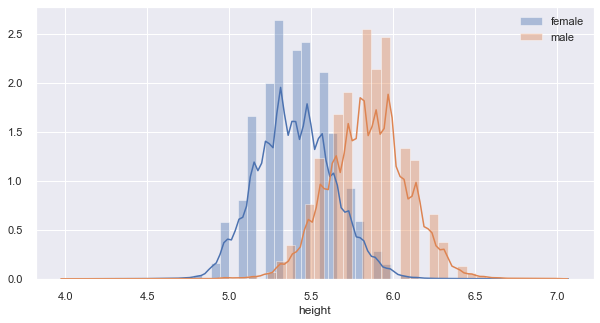

In [134]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(fitness_df[fitness_df['sex']=='f']['height'], hist=True)
sns.distplot(fitness_df[fitness_df['sex']=='m']['height'], hist=True)
plt.legend(['female', 'male'])
plt.show()

### **Features Viz by values**

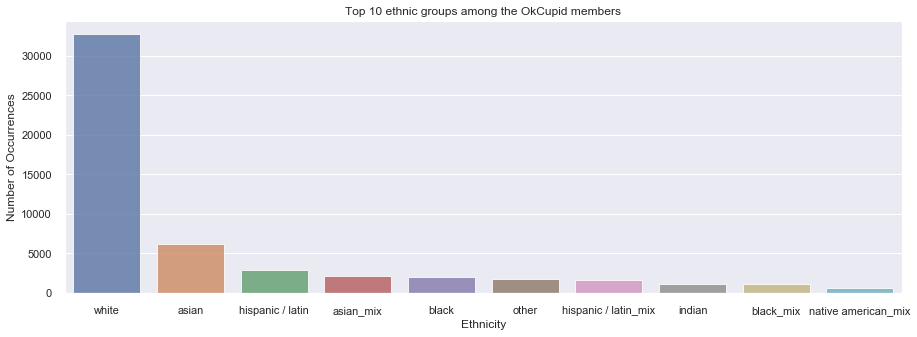

In [135]:
def get_ethnics(ethnicity):
    if ',' in ethnicity:
        pos = ethnicity.find(',')
        return ethnicity[0:pos] + '_' + 'mix'
    else:
        return ethnicity
    
fitness_df['ethnicity'] = fitness_df['ethnicity'].apply(get_ethnics) 

ethnic_count  = fitness_df[fitness_df['ethnicity']!='ans_skipped']['ethnicity'].value_counts()
ethnic_count = ethnic_count[:10,]
plt.figure(figsize=(15,5))
sns.barplot(ethnic_count.index, ethnic_count.values, alpha=0.8)
plt.title('Top 10 ethnic groups among the OkCupid members')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ethnicity', fontsize=12)
plt.show()

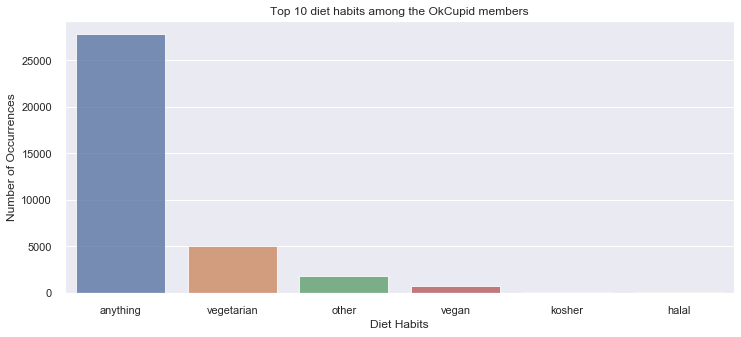

In [136]:
def get_diet(diet):
    if ' ' in diet:
        pos = diet.find(' ')
        return diet[pos+1:]
    else:
        return diet
    
fitness_df['diet'] = fitness_df['diet'].apply(get_diet) 

diet_count  = fitness_df[fitness_df['diet']!='ans_skipped']['diet'].value_counts()
diet_count = diet_count[:10,]
plt.figure(figsize=(12,5))
sns.barplot(diet_count.index, diet_count.values, alpha=0.8)
plt.title('Top 10 diet habits among the OkCupid members')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Diet Habits', fontsize=12)
plt.show()

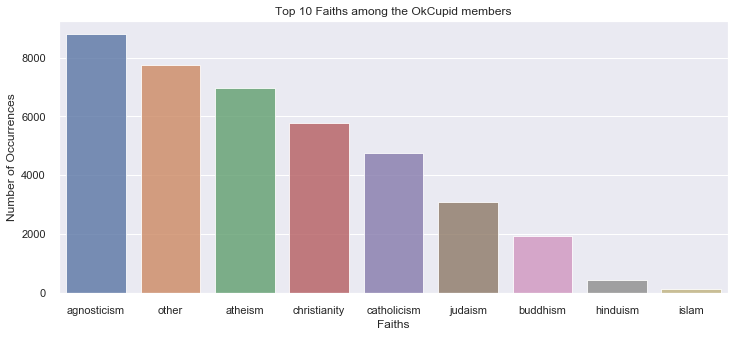

In [137]:
def get_religion(religion):
    if ' ' in religion:
        return religion.split(' ')[0]
    else:
        return religion
    
fitness_df['religion'] = fitness_df['religion'].apply(get_religion) 

religion_count  = fitness_df[fitness_df['religion']!='ans_skipped']['religion'].value_counts()
religion_count  = religion_count[:10,]
plt.figure(figsize=(12,5))
sns.barplot(religion_count.index, religion_count.values, alpha=0.8)
plt.title('Top 10 Faiths among the OkCupid members')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Faiths', fontsize=12)
plt.show()

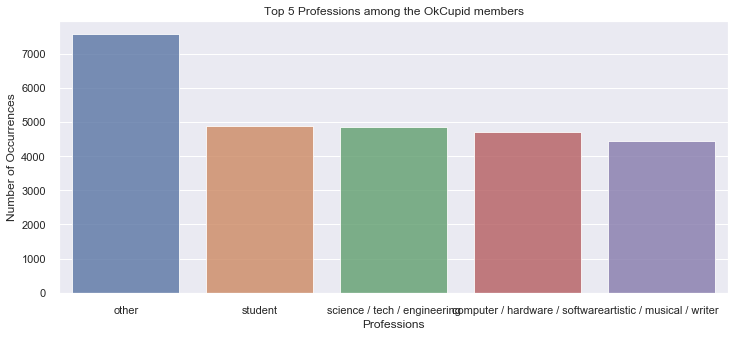

In [138]:
job_count  = fitness_df[fitness_df['job']!='ans_skipped']['job'].value_counts()
job_count  = job_count[:5,]
plt.figure(figsize=(12,5))
sns.barplot(job_count.index, job_count.values, alpha=0.8)
plt.title('Top 5 Professions among the OkCupid members')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Professions', fontsize=12)
plt.show()

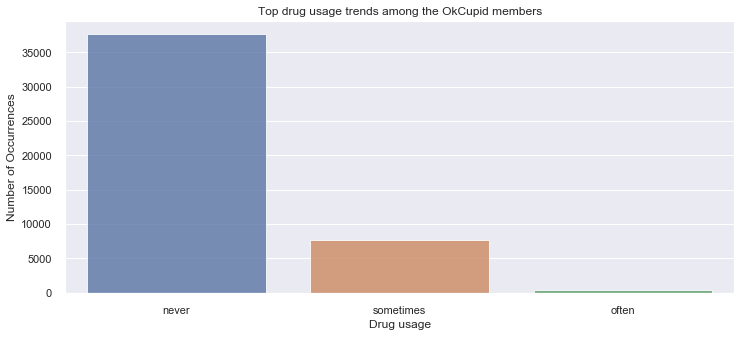

In [139]:
drug_count  = fitness_df[fitness_df['drugs']!='ans_skipped']['drugs'].value_counts()
drug_count  = drug_count[:5,]
plt.figure(figsize=(12,5))
sns.barplot(drug_count.index, drug_count.values, alpha=0.8)
plt.title('Top drug usage trends among the OkCupid members')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Drug usage', fontsize=12)
plt.show()

In [140]:
s = fitness_df['drugs'].astype('category', categories=["never", "sometimes", "often", "ans_skipped"])
print(s.unique())
print(s.cat.codes.unique())

[never, sometimes, ans_skipped, often]
Categories (4, object): [never, sometimes, ans_skipped, often]
[0 1 3 2]


## **Feature Interplay Viz**

### **What does Drug usage say about Fitness and Obesity levels ?**
* We will be using a variant of whats called a [Mosaic plot or a Mekko plot or Marimekko plot](https://en.wikipedia.org/wiki/Mosaic_plot), it looks very similar to a stacked bar plot but there are minor differences.

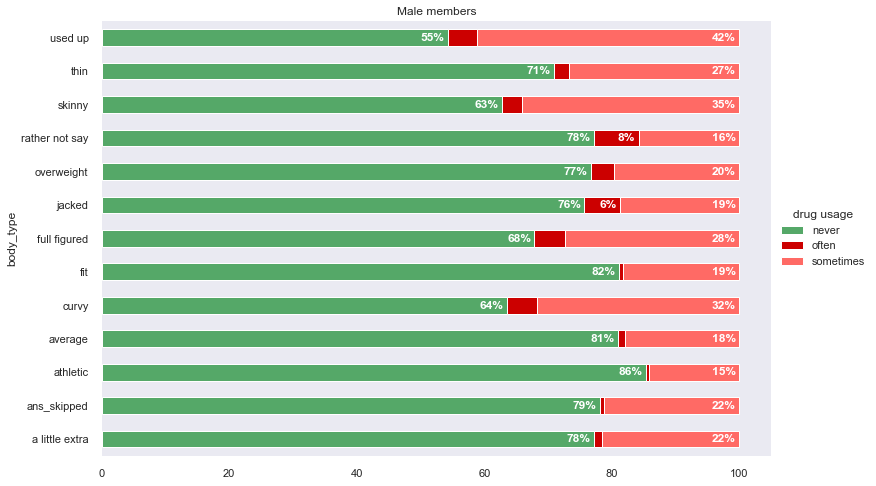

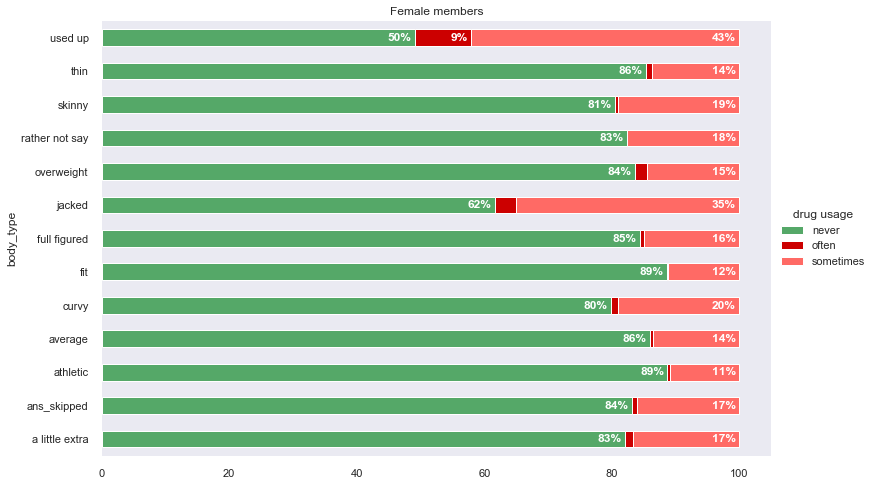

In [36]:
fitness_trn_drugs = gen_feature_specific_df(fitness_df,'body_type', 'drugs', 'm')
cols = list(fitness_trn_drugs.columns)
cols.remove('body_type')
cols.remove('sex')
cols.remove('ans_skipped')
fitness_trn_drugs = pd.pivot_table(fitness_trn_drugs, index=['body_type'],values=cols, aggfunc=np.sum)
color_list = ['g', '#cc0000', '#ff6a65']
ax = custom_plot(fitness_trn_drugs, "drug usage", "Male", color_list)

fitness_trn_drugs = gen_feature_specific_df(fitness_df,'body_type', 'drugs', 'f')
cols = list(fitness_trn_drugs.columns)
cols.remove('body_type')
cols.remove('sex')
cols.remove('ans_skipped')
fitness_trn_drugs = pd.pivot_table(fitness_trn_drugs, index=['body_type'],values=cols, aggfunc=np.sum)
color_list = ['g', '#cc0000', '#ff6a65']
ax= custom_plot(fitness_trn_drugs, "drug usage", "Female", color_list)

### **What does Alcohol intake say about Fitness and Obesity levels ?**

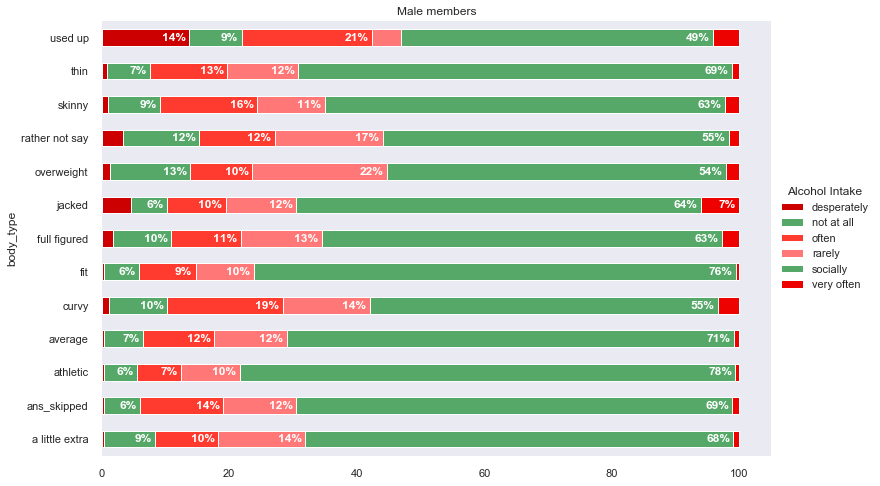

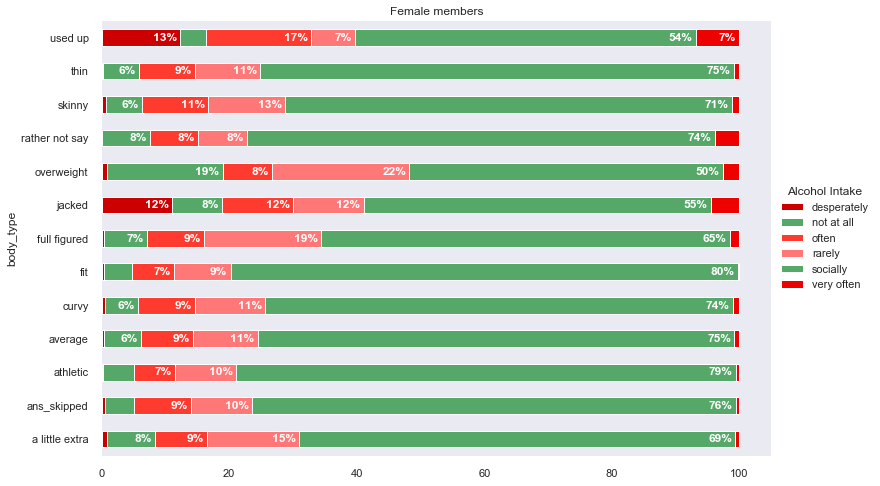

In [43]:
fitness_trn_drinks = gen_feature_specific_df(fitness_df,'body_type', 'drinks', 'm')
cols = list(fitness_trn_drinks.columns)
cols.remove('body_type')
cols.remove('sex')
cols.remove('ans_skipped')
fitness_trn_drinks = pd.pivot_table(fitness_trn_drinks, index=['body_type'],values=cols, aggfunc=np.sum)
# cols
color_list = ['#cc0000', 'g','#ff3b30','#ff7877','g', '#ee0200']
ax = custom_plot(fitness_trn_drinks, "Alcohol Intake", "Male",  color_list)


fitness_trn_drinks = gen_feature_specific_df(fitness_df,'body_type', 'drinks', 'f')
cols = list(fitness_trn_drinks.columns)
cols.remove('body_type')
cols.remove('sex')
cols.remove('ans_skipped')
fitness_trn_drinks = pd.pivot_table(fitness_trn_drinks, index=['body_type'],values=cols, aggfunc=np.sum)
# cols
color_list = ['#cc0000', 'g','#ff3b30','#ff7877','g', '#ee0200']
ax = custom_plot(fitness_trn_drinks, "Alcohol Intake", "Female", color_list)

### **What does Smoking habits say about Fitness and Obesity levels ?**

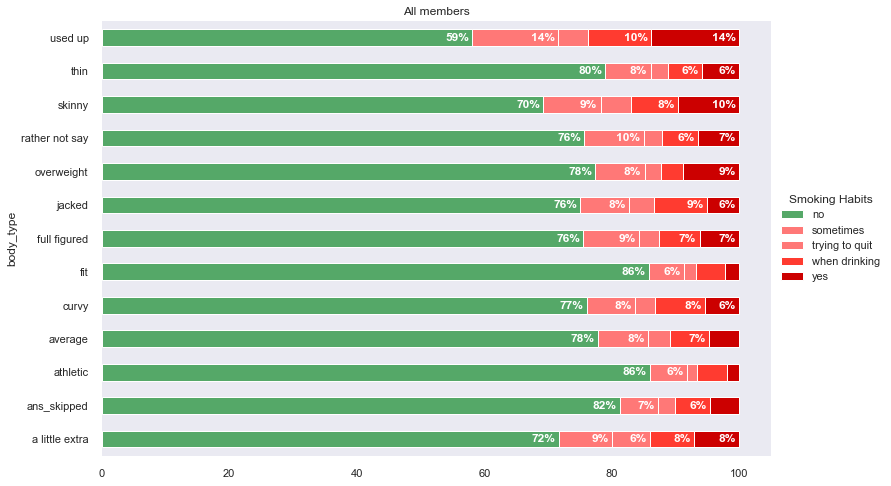

In [46]:
fitness_trn_smokes= gen_feature_specific_df(fitness_df,'body_type', 'smokes')
cols = list(fitness_trn_smokes.columns)
cols.remove('body_type')
cols.remove('sex')
cols.remove('ans_skipped')
fitness_trn_smokes = pd.pivot_table(fitness_trn_smokes, index=['body_type'],values=cols, aggfunc=np.sum)
# cols
color_list = ['g','#ff7877','#ff7877','#ff3b30', '#cc0000']
ax = custom_plot(fitness_trn_smokes, "Smoking Habits", "All", color_list)

### **What does Diet choices say about Fitness and Obesity levels ?**

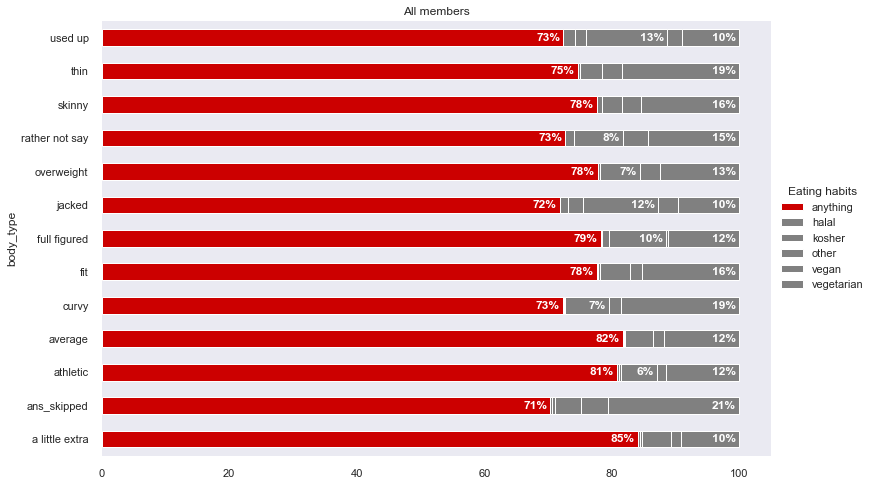

In [47]:
fitness_trn_diet= gen_feature_specific_df(fitness_df,'body_type', 'diet')
cols = list(fitness_trn_diet.columns)
cols.remove('body_type')
cols.remove('sex')
cols.remove('ans_skipped')
fitness_trn_diet = pd.pivot_table(fitness_trn_diet, index=['body_type'],values=cols, aggfunc=np.sum)
# cols
color_list = ['#cc0000', 'grey', 'grey','grey','grey', 'grey']
ax = custom_plot(fitness_trn_diet, "Eating habits", "All", color_list)

### **Has Income class anything to say about lifestyle and dietary choices ?**
* The below calculation is a conservative estimate, I understand this less for SF even in 2012 (the data is from 2012). But this still drives the point
* In 2019 65K to 192K was considered middle class in SF [source](https://www.sfgate.com/expensive-san-francisco/article/SF-household-income-192k-middle-class-median-13637536.php)

In [50]:
def get_income_group(income):
    if income <= -1:
        return "unknown"
    if income > 0 and income <= 30000:
        return "poor"
    elif income > 30001 and income <= 50000:   
        return "middle"
    elif income > 50001 and income <= 75000:   
        return "upper"
    elif income > 75001 and income <= 120000:
        return "affuent"
    elif income > 120001:
        return "wealthy"
    
fitness_df['income_class']  = fitness_df['income'].apply(get_income_group)      

### **Income class Vs Smoking ?**

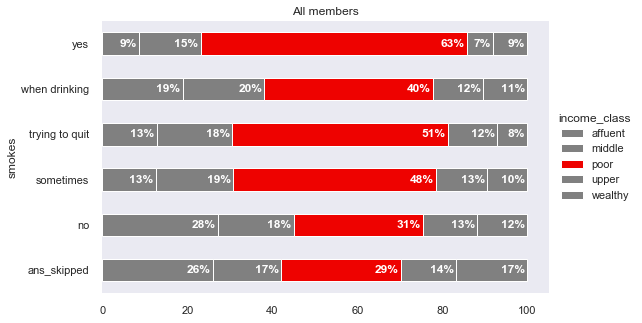

In [49]:
fitness_trn_income= gen_feature_specific_df(fitness_df[fitness_df.income > -1],'smokes', 'income_class')
cols = list(fitness_trn_income.columns)
cols.remove('smokes')
cols.remove('sex')
fitness_trn_income = pd.pivot_table(fitness_trn_income, index=['smokes'],values=cols, aggfunc=np.sum)
color_list = ['grey','grey', '#ee0200', 'grey', 'grey']
ax = custom_plot(fitness_trn_income, "income_class","All", color_list, (8,5))

### **Income class Vs Drugs ?**

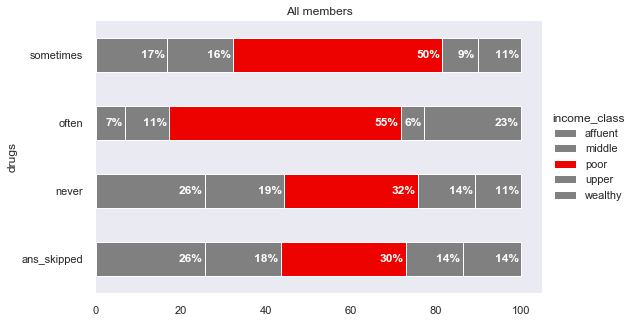

In [51]:
fitness_trn_income= gen_feature_specific_df(fitness_df[fitness_df.income > -1],'drugs', 'income_class')
cols = list(fitness_trn_income.columns)
cols.remove('drugs')
cols.remove('sex')
fitness_trn_income = pd.pivot_table(fitness_trn_income, index=['drugs'],values=cols, aggfunc=np.sum)
color_list = ['grey','grey', '#ee0200', 'grey', 'grey']
ax = custom_plot(fitness_trn_income, "income_class", "All", color_list, (8,5))

### **Income class Vs Drinks ?**

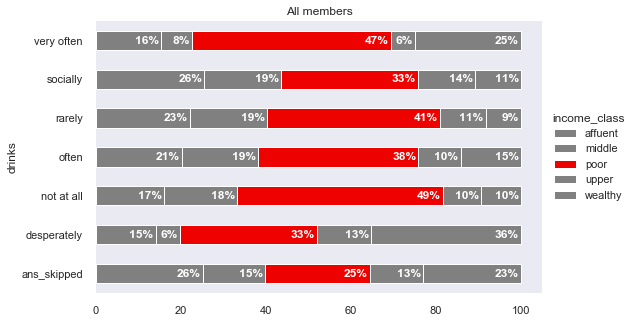

In [52]:
fitness_trn_income= gen_feature_specific_df(fitness_df[fitness_df.income > -1],'drinks', 'income_class')
cols = list(fitness_trn_income.columns)
cols.remove('drinks')
cols.remove('sex')
fitness_trn_income = pd.pivot_table(fitness_trn_income, index=['drinks'],values=cols, aggfunc=np.sum)
color_list = ['grey','grey', '#ee0200', 'grey', 'grey']
ax = custom_plot(fitness_trn_income, "income_class","All",color_list, (8,5))

### **Income class Vs Diet habits ?**

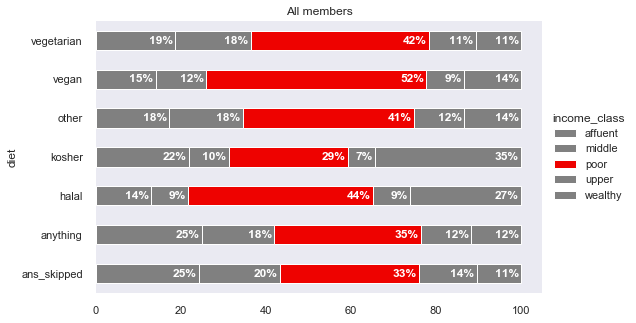

In [53]:
fitness_trn_income= gen_feature_specific_df(fitness_df[fitness_df.income > -1],'diet', 'income_class')
cols = list(fitness_trn_income.columns)
cols.remove('diet')
cols.remove('sex')
fitness_trn_income = pd.pivot_table(fitness_trn_income, index=['diet'],values=cols, aggfunc=np.sum)
color_list = ['grey','grey', '#ee0200', 'grey', 'grey']
ax = custom_plot(fitness_trn_income, "income_class","All",color_list,(8,5))

### **Income class Vs Fitness Levels or Obesity**

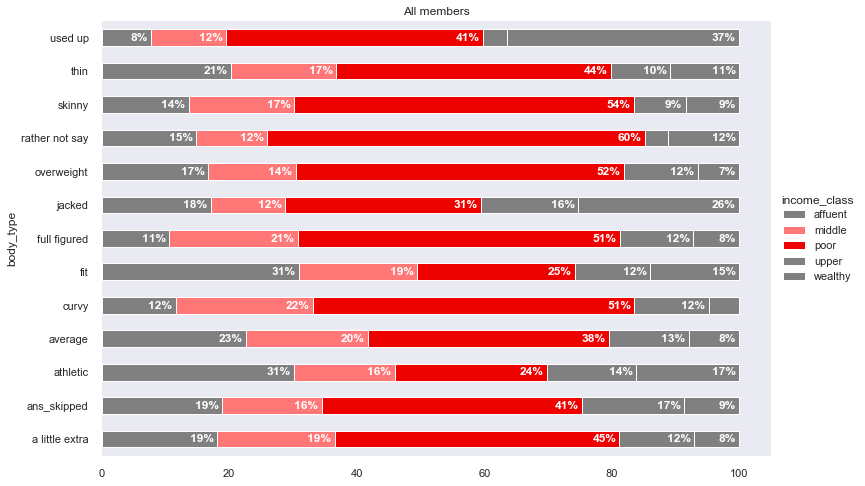

In [54]:
fitness_trn_income= gen_feature_specific_df(fitness_df[fitness_df.income > -1],'body_type', 'income_class')
cols = list(fitness_trn_income.columns)
cols.remove('body_type')
cols.remove('sex')
fitness_trn_income = pd.pivot_table(fitness_trn_income, index=['body_type'],values=cols, aggfunc=np.sum)
color_list = ['grey','#ff7877', '#ee0200', 'grey', 'grey']
ax = custom_plot(fitness_trn_income, "income_class","All",color_list)

### **Encoding Categorical features and Scaling Numerical features**

In [141]:
def encode_cat_features(df):
    
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import MinMaxScaler
    from sklearn_pandas import DataFrameMapper
    
    col_dtypes = zip(df.columns,df.dtypes)
    columns = []
    for col, dtype in col_dtypes:
        if dtype == 'O':
            columns.append((col, LabelEncoder()))
        else:
            columns.append(([col], MinMaxScaler()))

    mapper = DataFrameMapper(columns, df_out=True)
    return mapper.fit_transform(df)

In [142]:
encode_cat_features(fitness_df).sample(5)

,age,sex,education,job,offspring,location,income,diet,drinks,drugs,religion,smokes,pets,orientation,ethnicity,height,status,body_type
46540,0.176471,0,10,0,0,154,0.000000,0,5,1,1,1,0,2,16,0.457143,3,11
37954,0.235294,1,12,13,0,25,0.000000,0,5,1,8,3,15,2,16,0.685714,3,3
56739,0.882353,1,10,13,9,160,0.000000,1,5,1,4,1,0,2,16,0.714286,3,3
59427,0.176471,0,10,1,0,154,0.020001,0,3,3,9,1,9,0,12,0.514286,0,7
46465,0.431373,1,14,11,0,154,0.000000,1,5,1,4,1,6,1,16,0.542857,3,5


### **Correlation Heatmap**

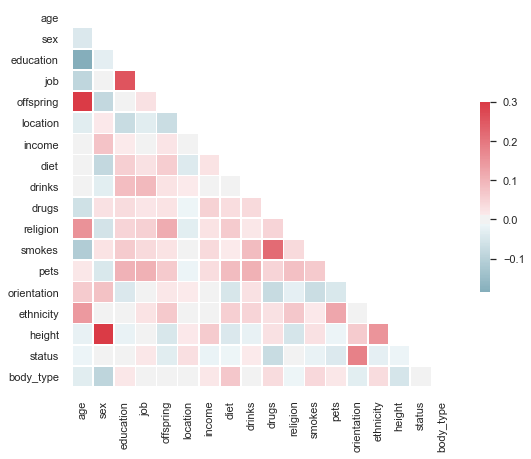

In [143]:
sns.set(style="white")


corr = encode_cat_features(fitness_df).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### **Bamboo lib PPS Heatmap**

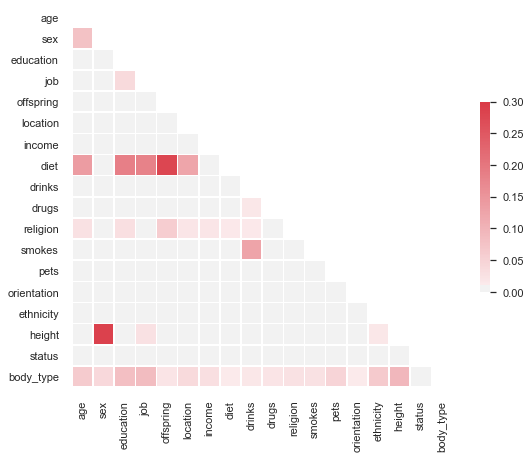

In [144]:
import ppscore as pps
df_matrix = pps.matrix(encode_cat_features(fitness_df))
f, ax = plt.subplots(figsize=(10, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### **Summary**
One correlation plot summarily suggests that there are correlations between **body type and features like diet, income, drinks, drugs, smokes and ethnicity**. Also the feature set correlations confirm our natural intuition as well for instance, drugs:smokes, sex:height, age:offspring all these pairs are strong ly and positively correlated. This will open up some interesting modelling opportunities.

----

### **Miscellaneous findings**
* **Look what I found**
* In the process of finding the the link between Income class and lifestyle, I was checking what were the top paid job with median reported income.
* Obviously CXOs and Top management are getting paid the highest next is banking followed by Tech jobs.
* Except for Tech world everywhere else women are paid lesser than men ! Thats just an observation in the fraction of the dataset.
* **But if in the purportedly progressive silicon valley if there is income equality ?**

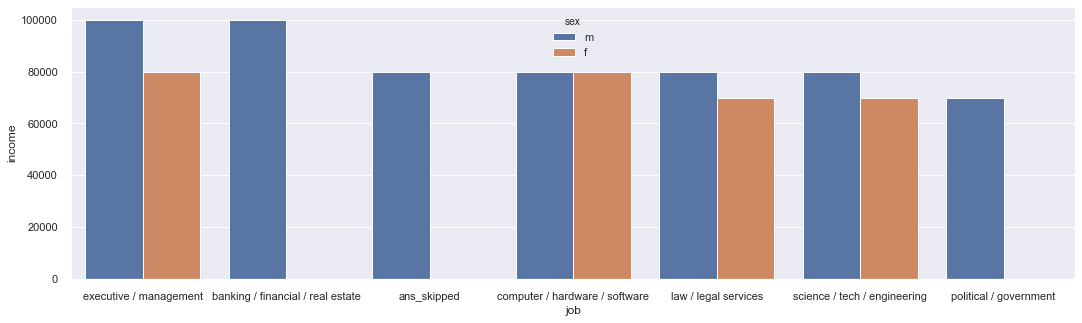

In [145]:
sns.set(rc={'figure.figsize':(18,5)})
result = fitness_df[fitness_df['income'] > -1].groupby(["job", "sex"])['income'].aggregate(np.median).reset_index().sort_values('income', ascending=False)
result = result[result['income'] >= 70000]
sns.barplot(x="job", y="income",  hue="sex", data=result)
plt.show()

* But At the same time by ethnicity Americans of Indian origin are the top paid, So there is Income inquality but not Racism or white privilege in Silicon valley ?
* **Just kidding this is a very small substrata of the population to answer these societal questions, any social scientist who is worth his/her salt would agree !**

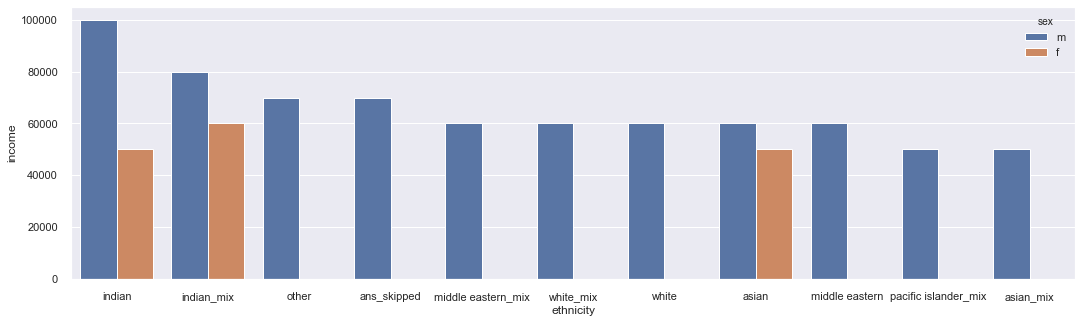

In [146]:
sns.set(rc={'figure.figsize':(18,5)})
result = fitness_df[fitness_df['income'] > -1].groupby(["ethnicity", "sex",])['income'].aggregate(np.median).reset_index().sort_values('income', ascending=False)
result = result[result['income'] >= 50000]
sns.barplot(x="ethnicity", y="income",  hue="sex", data=result)
plt.show()

* **You want to see another abomination ?**

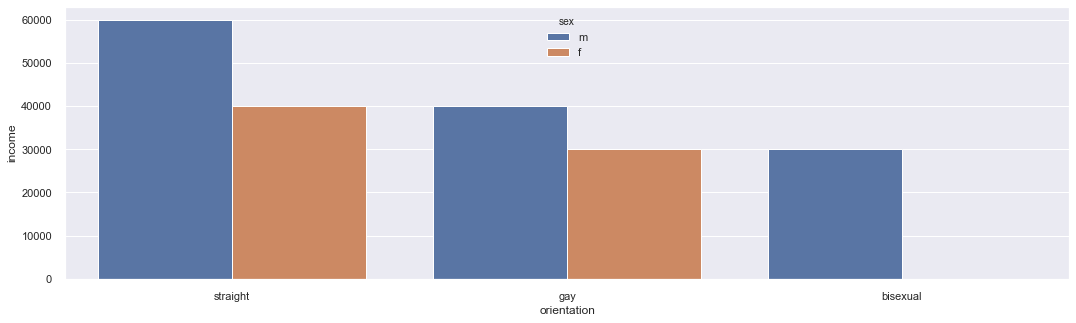

In [147]:
sns.set(rc={'figure.figsize':(18,5)})
result = fitness_df[fitness_df['income'] > -1].groupby(["orientation", "sex",])['income'].aggregate(np.median).reset_index().sort_values('income', ascending=False)
result = result[result['income'] >= 30000]
sns.barplot(x="orientation", y="income",  hue="sex", data=result)
plt.show()

### **Check if we can harvest isActive life style feature from the Essays**

* Below mental model shows how to approach a NLP problem based in the dataset
* While we could play by it, lets see if we can use a **simple keyword based approach** to extract isActive feature for the essays

<img src="https://miro.medium.com/max/2000/1*fuKYhDkyPBY4f559OeftRA.png"> </img>

In [62]:
def has_active_lifestyle(essay_test):
    keywords = ['fit', 'physique', 'workout', 'gym','active', 'exercise', 'run', 'jog', 'lift', 'bike', 'swim', 'hike', 'trek', 'sport', 'athelete']
    count = 0
    for keyword in keywords:
        if keyword in essay_test.split(' '):
            count += 1
            if count >=1:
                return True
    return False   

okc_profiles['profile_text'] = okc_profiles['essay0'].fillna('') + okc_profiles['essay3'].fillna('') 
okc_profiles['isActive'] = okc_profiles['profile_text'].apply(has_active_lifestyle)
okc_profiles[okc_profiles.isActive == True].shape

(6409, 33)

In [63]:
pd.set_option('display.max_colwidth', -1)
okc_profiles[okc_profiles.isActive == True].sample(2)[['profile_text']]

,profile_text
40365,"i'm a bay area local, but now i am living in the city on nob hill\nand working downtown. i absolutely love sf and all that it has to\noffer. i'm a pretty social person and often out on the town - happy\ngrabbing drinks with friends, checking out a new restaurant or\nheading to a giants game! also like to stay active with hiking,\ntennis or hitting the gym. i have a great sense of humor and love\nto laugh, i'm looking forward to meeting some new fun people that\ndon't take this too seriously and are ready to have some\nadventures! :)my smile and sense of humor; i also have an interesting look and\npeople rarely realize my ethnicity- i'm mixed italian, german and\nblack."
28608,"imagine a funny, irreverent, enthusiastic, driven and curious\nnerd-of-all-trades. imagine him driving hard to reach his goals, a\nfirece entrepreneurial spirit, the epitome of the american\nmale....<br />\n<br />\n""whoah. wait a second. these things are true, but he's also\nexpressive! he's excited and theatrical! he seems incapable of\nspeaking in a monotone! this isn't the kind of guy i'm supposed to\nbe attracted to! he must be gay, that's the only explanation. only\ngay dudes wear interesting clothes and express their excitement\nabout the world. bummer, he was cute too....""<br />\n<br />\ni see this dialogue play out in people's heads a lot and it cracks\nme up.<br />\n<br />\nthe world is a fascinating place and i must know more about it. i\nwas born into a family of musicians, educators, and theatre people,\nand have picked up nearly every trait one would expect from these\narchetypes. no existing box seems to fit my personality or diverse\ninterests, so i have always created my own. i make a living off my\nsense of humor and i like it that way.i'm usually talking up a storm about something that excites me."


* Simple but good enough !!